# Perguntas

- faixa etária (min-10, 10-20, 20-50, 50-60, 60-max) x sexo x survived
- pessoas que viajaram com parentes x survived
- tarifa x porto de embarque x genero
- tarifa vs mulhe

# Preparando

In [1]:
# Importando os pacotes usados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Carregando os datasets de train.csv e test.csv
path_projeto = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
path_data_train = os.path.join(path_projeto, "data", "train.csv")
path_data_test = os.path.join(path_projeto, "data", "test.csv")

base_train = pd.read_csv(path_data_train)
base_test = pd.read_csv(path_data_test)

In [3]:
# Concatenando os datasets
base = pd.concat([base_train, base_test], axis=0)

In [4]:
# Salvando o dataset de test
comeco_test = len(base_train)

# Entendendo


**Survived**: Sobreviveu? 
- 0 = não
- 1 = sim

**pclass**: Classe na viagem (assim com avião) 
- 1 = primeira
- 2 = segunda
- 3 = terceira

**sex**: Sexo do passageiro.

**Age**: Idade em anos.

**sibsp**: Número de irmãos ou esposas que estavam no titanic.

**parch**: Número de pais ou filhos que estavam no titanic.

**ticket**: Número do bilhete.

**fare**: Custo da passagem em Libras.

**cabin**: Número da cabine.

**embarked**: Porto de embarque do passageiro: S = Cherbourg, Q = Queenstown, S = Southampton.

## Observações

**age**: pode ser fracionada se a idade for estimada, assumirá o formato de xx.5.

**sibsp**: O dataset define as relações familiares assim...
- irmão
- irmã
- meio-irmão
- meia-irmã
- marido
- esposa 
- amantes e noivos foram **ignorados**

**parch**: O dataset define as relações familiares assim...
- pai
- mãe
- filho
- filha
- enteado
- enteada
- para quaisquer crianças que viajaram apenas com uma babá, **parch=0**.

# Limpeza e Tratamento

## dataset 

Vamos alterar os index labels das colunas para caixa baixa. 'Age' -> 'age''

In [5]:
# Modificando os indexs labels
base.columns = base.columns.map(lambda x: x.casefold()) 

Vamos criar uma cópia do dataframe original para tratar e limpar os dados dos dois datasets (Train e Test) de uma só vez.

In [6]:
# Novo dataset
df = base.copy().reset_index().drop(axis=1,labels='index')

## passengerid

In [7]:
# Excluíndo a variável.
df.drop(axis = 1, labels = 'passengerid', inplace=True)

## pclass

In [8]:
df['pclass'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: pclass
Non-Null Count  Dtype
--------------  -----
1309 non-null   int64
dtypes: int64(1)
memory usage: 10.4 KB


In [9]:
df['pclass'].unique()

array([3, 1, 2])

## name

In [10]:
df['name'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: name
Non-Null Count  Dtype 
--------------  ----- 
1309 non-null   object
dtypes: object(1)
memory usage: 10.4+ KB


Vamos remover a variável pois não conseguimos lidar muito bem com os titulos pessoais para a criação de mais uma variável, e de resto essa nos parece ruim para o modelo de decision tree.

In [11]:
# removendo a variável do dataset principal
df.drop(axis=1, labels='name', inplace=True)

## sex

In [12]:
df['sex'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: sex
Non-Null Count  Dtype 
--------------  ----- 
1309 non-null   object
dtypes: object(1)
memory usage: 10.4+ KB


Vamos trocar 'female' e 'male' para 0 e 1 respectivamente.

In [13]:
df['sex'].replace(['male','female'], [0,1], inplace=True)

In [14]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0.0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,1,38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## age

In [15]:
df['age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: age
Non-Null Count  Dtype  
--------------  -----  
1046 non-null   float64
dtypes: float64(1)
memory usage: 10.4 KB


Resolvemos preencher os valores vazios de acordo com a média de idade de extratos que criamos de acordo com as variáveis "pcalss" e "sex".

In [16]:
# Preenchendo os valores vazios.
foo = df['age'].iloc[:891].fillna(
    df.iloc[:891, :].groupby(by=['pclass','sex'])['age'].transform(func='mean'))

bar = df['age'].iloc[891:].fillna(
    df.iloc[891:,:].groupby(by=['pclass','sex'])['age'].transform(func='mean'))

df['age'] = pd.concat([foo,bar])

df.iloc[:891, :].groupby(by=['pclass','sex'])['age'].mean()

pclass  sex
1       0      41.281386
        1      34.611765
2       0      30.740707
        1      28.722973
3       0      26.507589
        1      21.750000
Name: age, dtype: float64

## sibsp

In [17]:
df['sibsp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: sibsp
Non-Null Count  Dtype
--------------  -----
1309 non-null   int64
dtypes: int64(1)
memory usage: 10.4 KB


In [18]:
df['sibsp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

## parch

In [19]:
df['parch'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: parch
Non-Null Count  Dtype
--------------  -----
1309 non-null   int64
dtypes: int64(1)
memory usage: 10.4 KB


In [20]:
df['parch'].unique()

array([0, 1, 2, 5, 3, 4, 6, 9])

## ticket

In [21]:
# Excluíndo a variável
df.drop(axis=1, labels='ticket',inplace=True)

## fare

In [22]:
df['fare'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: fare
Non-Null Count  Dtype  
--------------  -----  
1308 non-null   float64
dtypes: float64(1)
memory usage: 10.4 KB


In [23]:
df['fare'].fillna(base.groupby(['embarked', 'pclass'])['fare'].median()['S'][3], inplace=True)

## cabin

In [24]:
# Excluíndo a variável
df.drop(axis=1, labels='cabin',inplace=True)

## embarked

Seguimos o site (https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html) para preencher os valores vazios dessa coluna.

In [25]:
df['embarked'].fillna("S", inplace=True)

In [26]:
df['embarked'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: embarked
Non-Null Count  Dtype 
--------------  ----- 
1309 non-null   object
dtypes: object(1)
memory usage: 10.4+ KB


In [27]:
df['embarked'].replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)

## descompactando train de test

In [28]:
# Criando 2 objetos com os dados de train e test separados
df_train = df.iloc[:891, :].copy()
df_test = df.iloc[891:, :].copy()

# Análise exploratória

## pclass

### univariada

In [29]:
# informações gerais
df_train[['pclass']].describe()

,pclass
count,891.000000
mean,2.308642
std,0.836071
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,3.000000


In [30]:
# frequencia absoluta
pd.DataFrame(df_train['pclass'].value_counts(sort = False).sort_index())

,pclass
1,216
2,184
3,491


In [31]:
# frequencia relativa
pd.DataFrame((df_train['pclass'].value_counts(normalize = True).sort_index() * 100).round(2))

,pclass
1,24.24
2,20.65
3,55.11


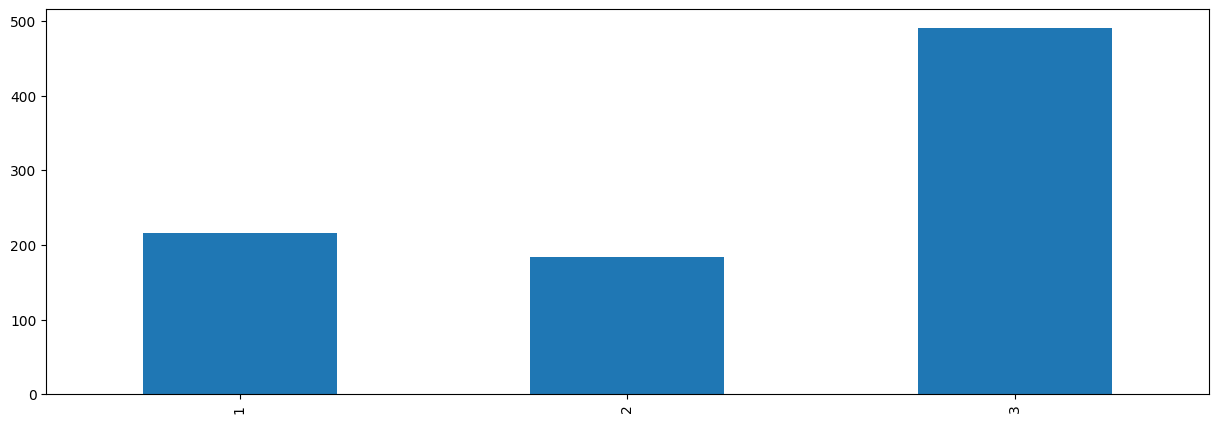

In [32]:
# gráfico de frequência
foo = df_train['pclass'].value_counts().sort_index()
foo.plot(kind='bar', figsize = (15, 5))
plt.show()

### bivariada

#### with survived

In [33]:
(df_train.groupby(by = 'pclass')['survived'].value_counts(normalize = True).sort_index() * 100).round(2)

pclass  survived
1       0.0         37.04
        1.0         62.96
2       0.0         52.72
        1.0         47.28
3       0.0         75.76
        1.0         24.24
Name: survived, dtype: float64

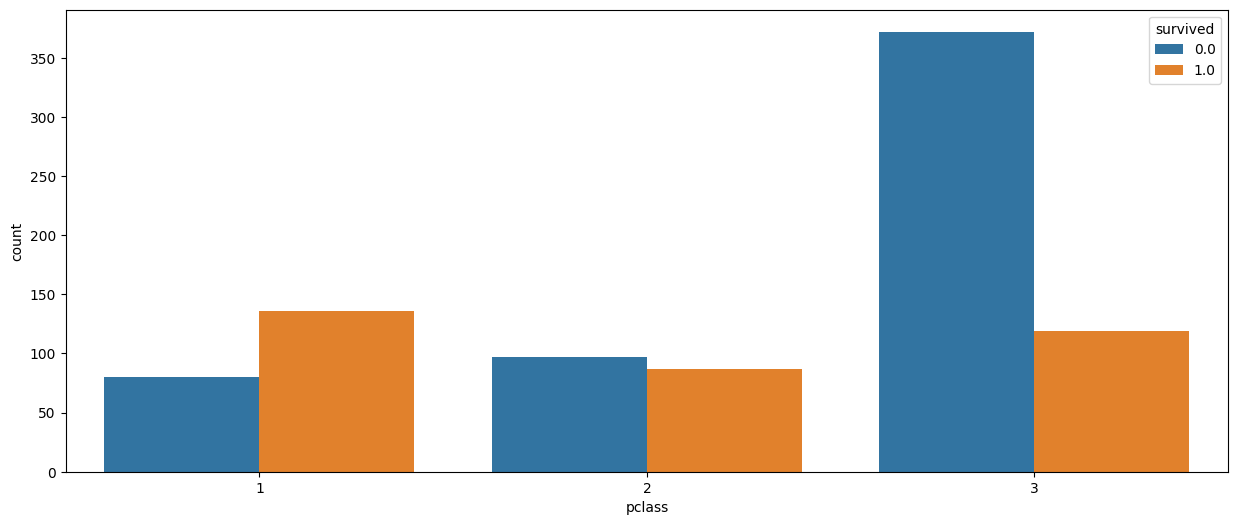

In [34]:
# correlação de classe sobrevivencia ou náo
plt.figure(figsize=(15, 6))
sns.countplot(data = df_train, x='pclass', hue='survived')
plt.show()

#### with sex

In [35]:
(df_train.groupby(by = 'pclass')['sex'].value_counts(normalize = True).sort_index() * 100).round(2)

pclass  sex
1       0      56.48
        1      43.52
2       0      58.70
        1      41.30
3       0      70.67
        1      29.33
Name: sex, dtype: float64

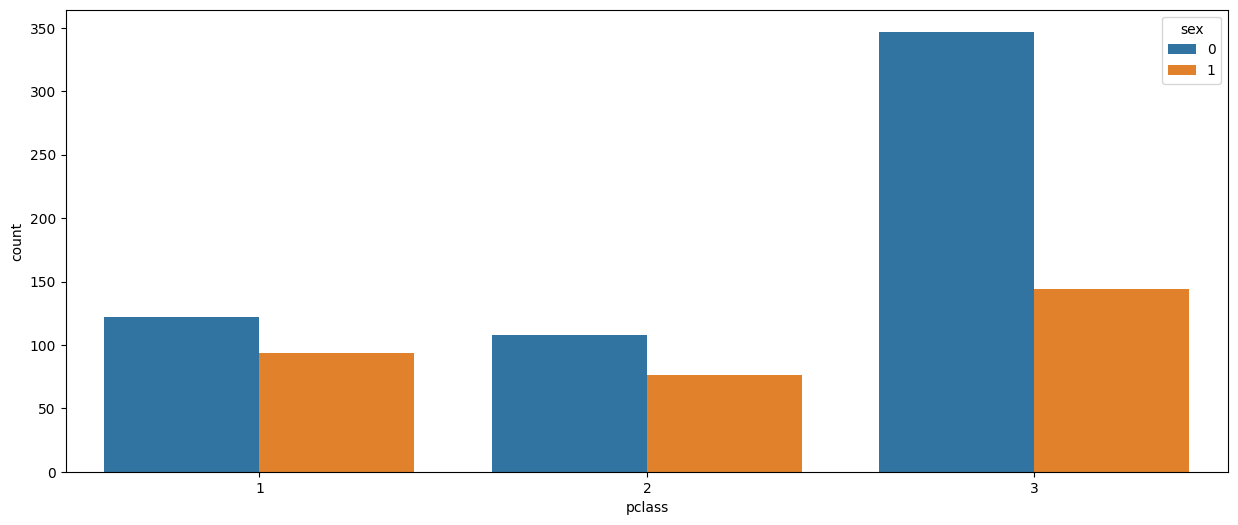

In [36]:
# correlação de classe sobrevivencia ou náo
plt.figure(figsize=(15, 6))
sns.countplot(data = df_train, x='pclass', hue='sex')
plt.show()

### multivariada

#### with sex and survived

In [37]:
# quantos % das mulheres soreviveu
(df_train.groupby(by = ['pclass', 'sex'])['survived'].value_counts(normalize=True).sort_index() * 100).round(2)

pclass  sex  survived
1       0    0.0         63.11
             1.0         36.89
        1    0.0          3.19
             1.0         96.81
2       0    0.0         84.26
             1.0         15.74
        1    0.0          7.89
             1.0         92.11
3       0    0.0         86.46
             1.0         13.54
        1    0.0         50.00
             1.0         50.00
Name: survived, dtype: float64

## sex

### univariada

In [38]:
# frequencia absoluta
pd.DataFrame(df_train['sex'].value_counts().sort_index())

,sex
0,577
1,314


In [39]:
# frequencia relativa
pd.DataFrame((df_train['sex'].value_counts(normalize = True).sort_index() * 100).round(2))

,sex
0,64.76
1,35.24


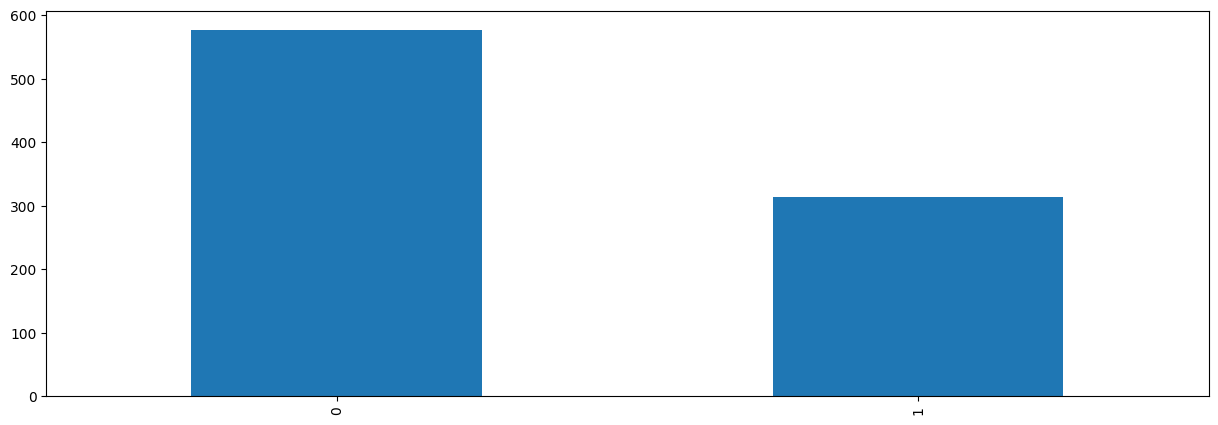

In [40]:
# gráfico de frequência
foo = df_train['sex'].value_counts(sort=False)
foo.plot(kind='bar', figsize = (15, 5))
plt.show()

### bivariada

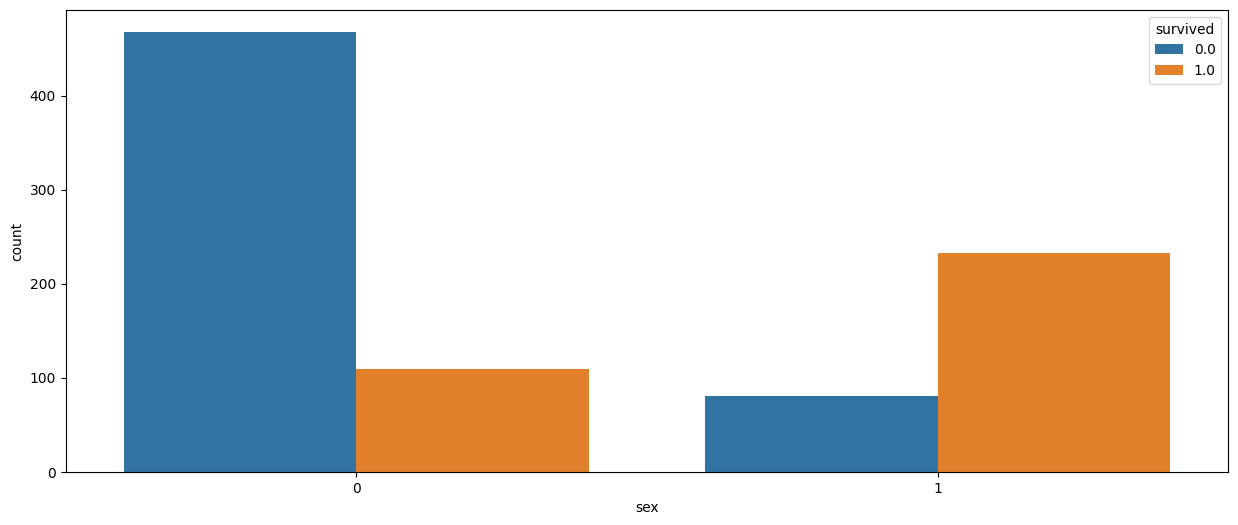

In [41]:
plt.figure(figsize=(15, 6))

sns.countplot(data=df_train, x='sex', hue='survived')
plt.show()

### multivariada

## age

### analisando os valores vazios

In [100]:
foo = base_train[base_train['Age'].isna()]
foo['Sex'].value_counts(normalize=True)

male      0.700565
female    0.299435
Name: Sex, dtype: float64

In [101]:
foo['Pclass'].value_counts(normalize=True)

3    0.768362
1    0.169492
2    0.062147
Name: Pclass, dtype: float64

In [107]:
pd.crosstab(index=foo['Pclass'], columns=foo['Sex'], normalize = True)

Sex,female,male
Pclass,,
1,0.050847,0.118644
2,0.011299,0.050847
3,0.237288,0.531073


### univariada

In [42]:
# frequencia absoluta
pd.DataFrame(df_train['age'].value_counts())

,age
26.507589,94
21.750000,42
24.000000,30
22.000000,27
18.000000,26
...,...
14.500000,1
70.500000,1
12.000000,1
36.500000,1


In [43]:
# Separatrizes 
df_train[['age']].describe()

,age
count,891.000000
mean,29.318643
std,13.281103
min,0.420000
25%,21.750000
50%,26.507589
75%,36.000000
max,80.000000


In [44]:
# moda
df_train['age'].mode()[0].round(2)

26.51

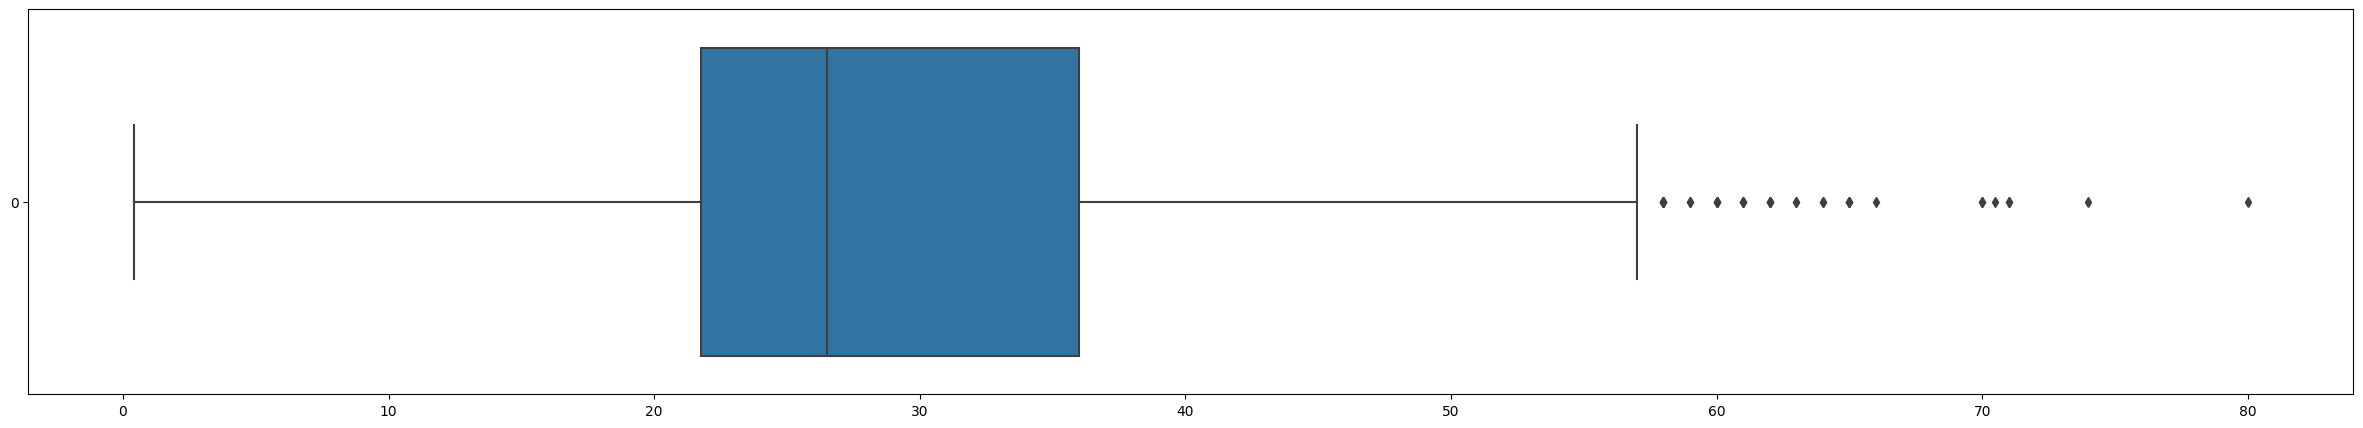

In [45]:
# boxplot
plt.figure(figsize=(30, 5))
sns.boxplot(df_train['age'], orient='h')
plt.show()

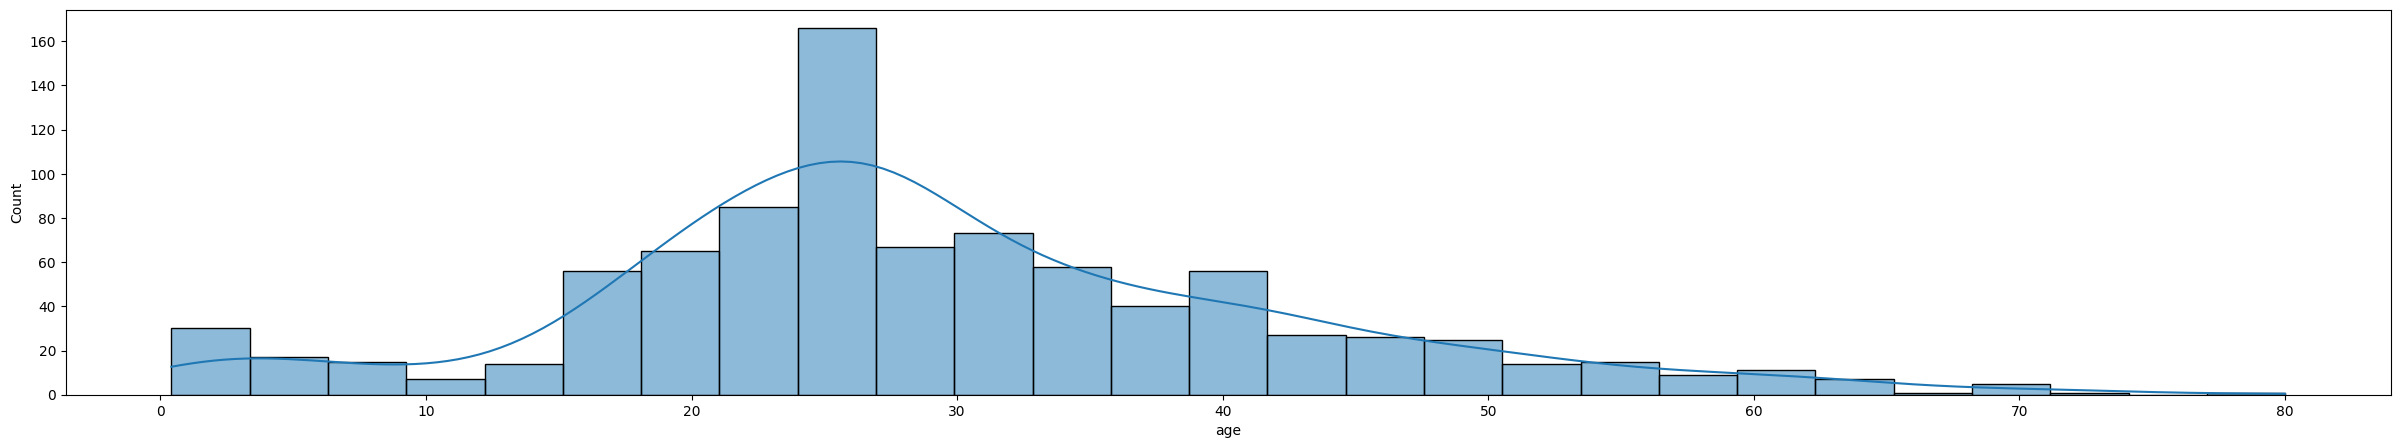

In [46]:
plt.figure(figsize=(30, 5))
sns.histplot(df_train['age'], kde=True)
plt.show()

### bivariada

In [47]:
foo = pd.cut(x=df_train['age'],bins=[i for i in range(0, 81, 5)]).rename('age_class')
bar = pd.concat([df_train,foo], axis = 1)

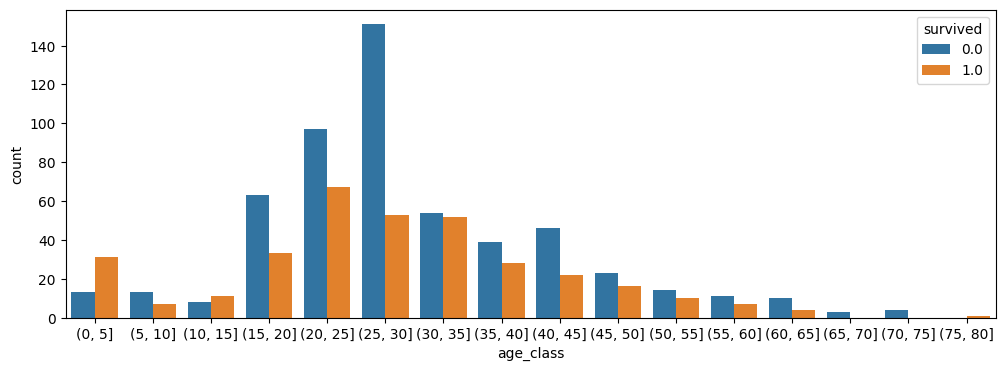

In [48]:
plt.figure(figsize=(12, 4))

sns.countplot(data=bar, x = 'age_class', hue='survived')
plt.show()

In [49]:
# coeficiente de spearman
bar['age'].corr(method = 'spearman', other=bar['survived'])

-0.0442790990763651

### multivariada

faixa etária (min-10, 10-20, 20-50, 50-60, 60-max) x sexo x survived

In [78]:
df_train

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0.0,3,0,22.00,1,0,7.2500,1
1,1.0,1,1,38.00,1,0,71.2833,2
2,1.0,3,1,26.00,0,0,7.9250,1
3,1.0,1,1,35.00,1,0,53.1000,1
4,0.0,3,0,35.00,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0.0,2,0,27.00,0,0,13.0000,1
887,1.0,1,1,19.00,0,0,30.0000,1
888,0.0,3,1,21.75,1,2,23.4500,1
889,1.0,1,0,26.00,0,0,30.0000,2


In [83]:
faixa_etaria = [min(df_train['age']), 10, 20, 40, 60, max(df_train['age'])]
labels = ['criança', 'jovem', 'adulto', 'coroa', 'velho']

foo = pd.cut(x=df_train['age'], bins=faixa_etaria, labels=labels, include_lowest=True)

0      adulto
1      adulto
2      adulto
3      adulto
4      adulto
        ...  
886    adulto
887     jovem
888    adulto
889    adulto
890    adulto
Name: age, Length: 891, dtype: category
Categories (5, object): ['criança' < 'jovem' < 'adulto' < 'coroa' < 'velho']

##  fare

### univariada

(-0.513, 51.233]      82.154882
(51.233, 102.466]     11.896745
(102.466, 153.699]     3.479237
(153.699, 204.932]     0.224467
(204.932, 256.165]     1.234568
(256.165, 307.398]     0.673401
(307.398, 358.63]      0.000000
(358.63, 409.863]      0.000000
(409.863, 461.096]     0.000000
(461.096, 512.329]     0.336700
Name: fare, dtype: float64


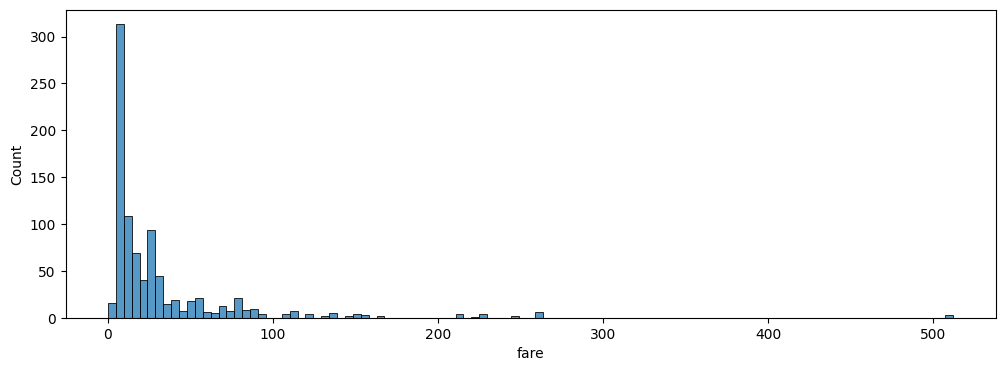

In [50]:
# Distribuição
fare = df_train['fare']
print((fare.value_counts(bins = 10, normalize=True)*100).sort_index())
plt.figure(figsize=(12, 4))
sns.histplot(data=fare)
plt.show()

In [51]:
# Tendência central
print(fare.describe())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


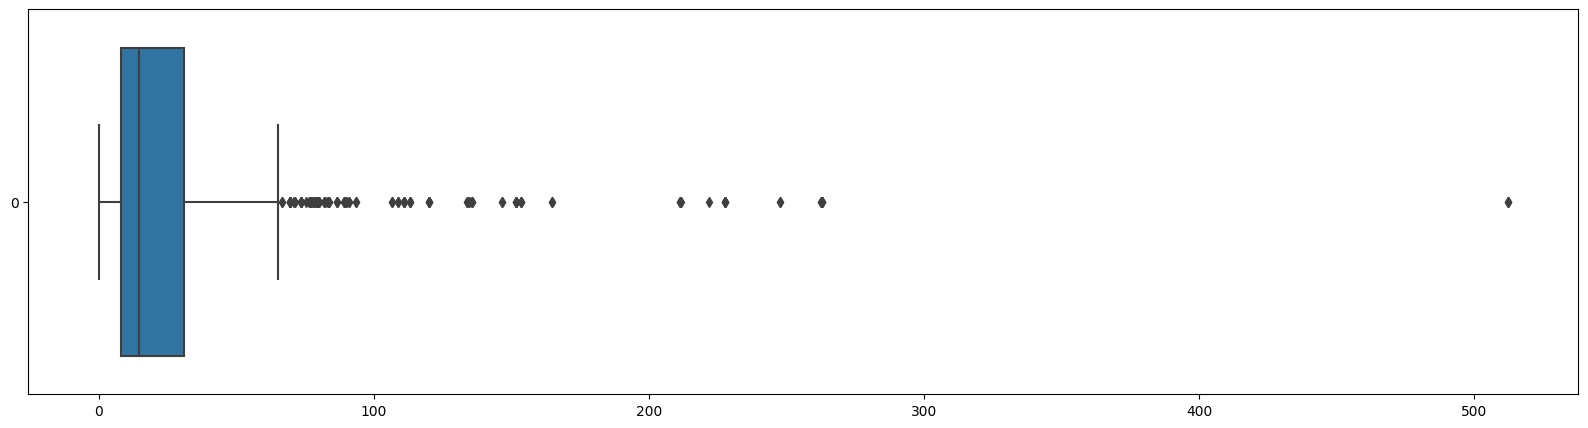

In [52]:
# Dispersão
plt.figure(figsize=(20,5))
sns.boxplot(data=fare, orient='h')
plt.show()

### bivariada

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0.0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1.0,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


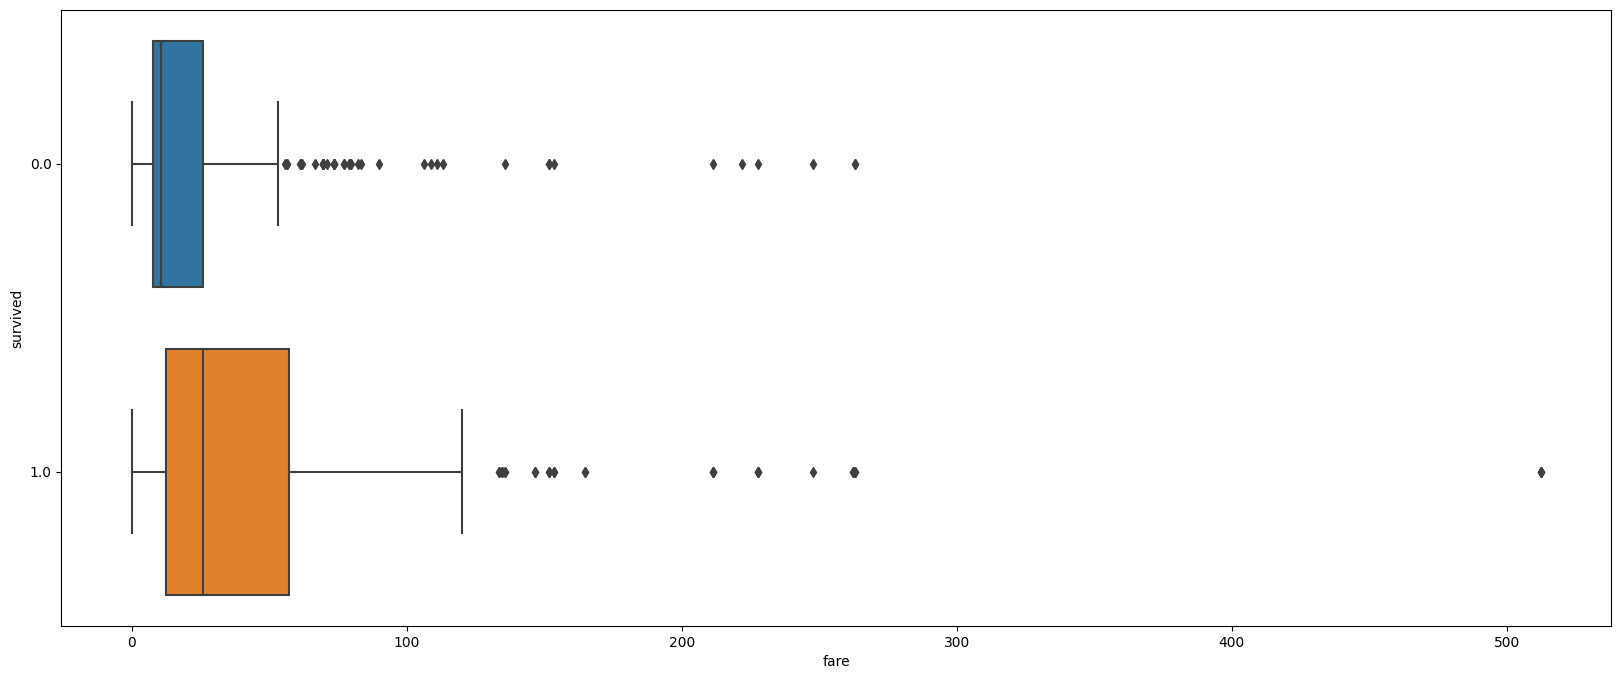

In [53]:
# corr. survived
display(df_train.groupby('survived')['fare'].describe())
print()
plt.figure(figsize=(20,8))
sns.boxplot(x=fare,y=df_train['survived'], orient='h')
plt.show()

        count       mean        std  min      25%      50%       75%       max
pclass                                                                        
1       323.0  87.508992  80.447178  0.0  30.6958  60.0000  107.6625  512.3292
2       277.0  21.179196  13.607122  0.0  13.0000  15.0458   26.0000   73.5000
3       709.0  13.295480  11.487932  0.0   7.7500   8.0500   15.2458   69.5500


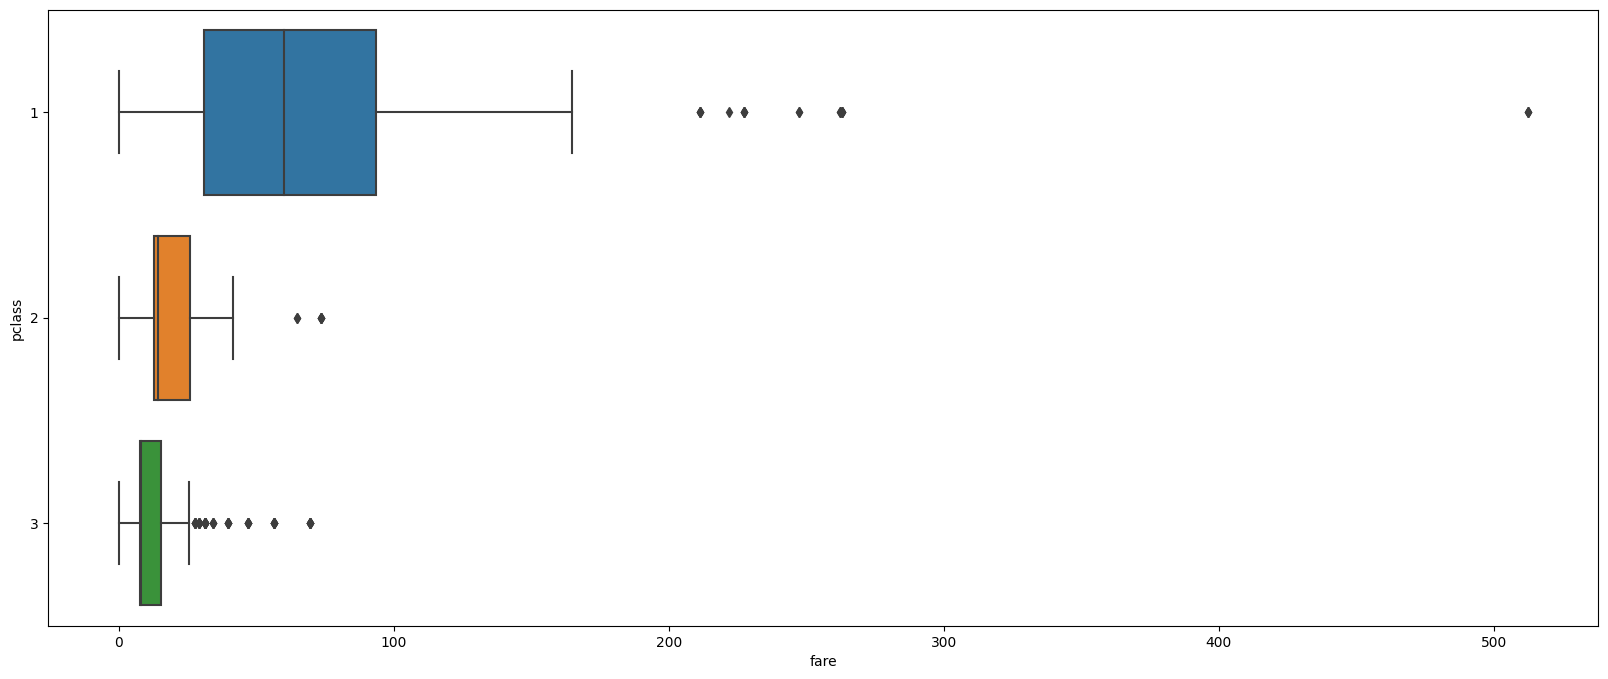

In [54]:
# corr. classe
print(df.groupby('pclass')['fare'].describe())
plt.figure(figsize=(20,8))
sns.boxplot(x=fare,y=df['pclass'], orient='h')
plt.show()

count    491.000000
mean      13.675550
std       11.778142
min        0.000000
25%        7.750000
50%        8.050000
75%       15.500000
max       69.550000
Name: fare, dtype: float64
moda = 8.05


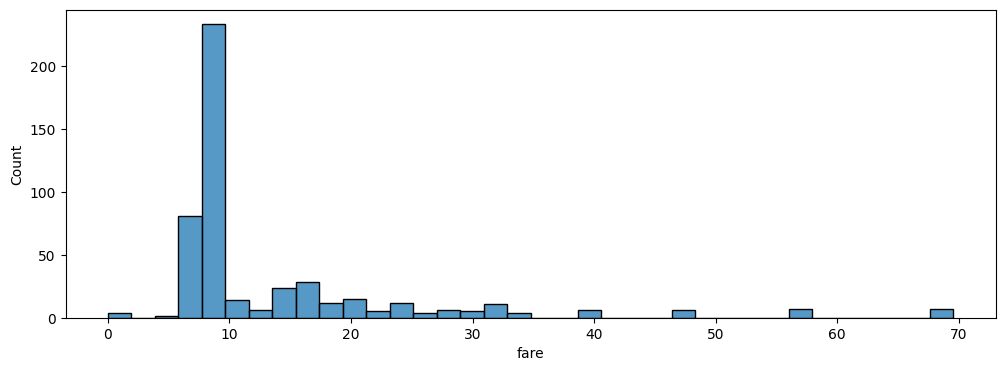

count    184.000000
mean      20.662183
std       13.417399
min        0.000000
25%       13.000000
50%       14.250000
75%       26.000000
max       73.500000
Name: fare, dtype: float64
moda = 13.0


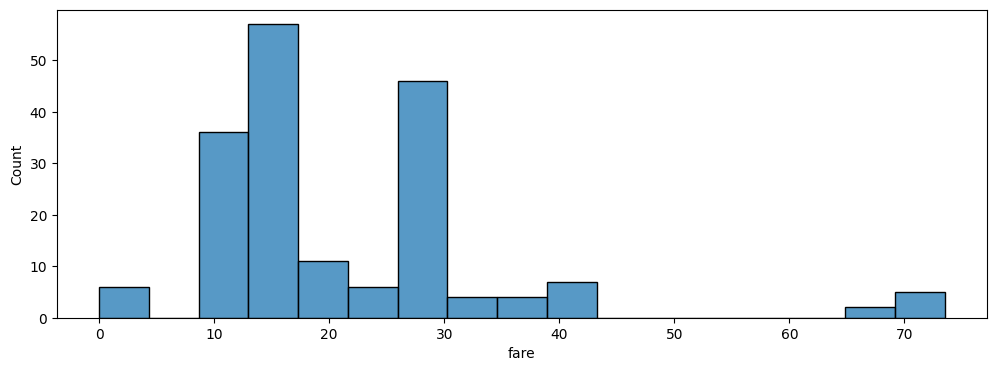

count    216.000000
mean      84.154687
std       78.380373
min        0.000000
25%       30.923950
50%       60.287500
75%       93.500000
max      512.329200
Name: fare, dtype: float64
moda = 26.55


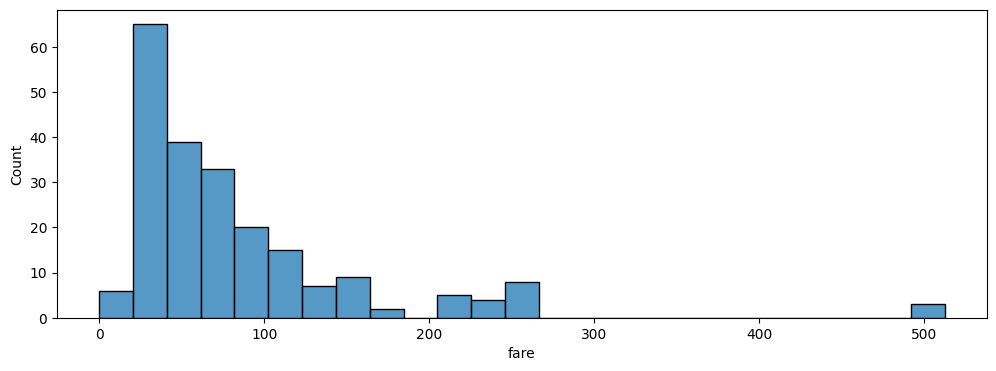

In [55]:
for i in [3,2,1]:
    foo = df_train.query(f'pclass == {i}')['fare']
    print(foo.describe())
    print(f'moda = {foo.mode()[0]}')
    plt.figure(figsize=(12, 4))
    sns.histplot(data=foo)
    plt.show()

### multivariada

In [56]:
#

## embarked

### univariada

In [57]:
# frequencia absoluta
pd.DataFrame(df_train['embarked'].value_counts(sort = False).sort_index())

,embarked
1,646
2,168
3,77


In [58]:
# frequencia relativa
pd.DataFrame((df_train['embarked'].value_counts(normalize = True).sort_index() * 100).round(2))

,embarked
1,72.50
2,18.86
3,8.64


<AxesSubplot: >

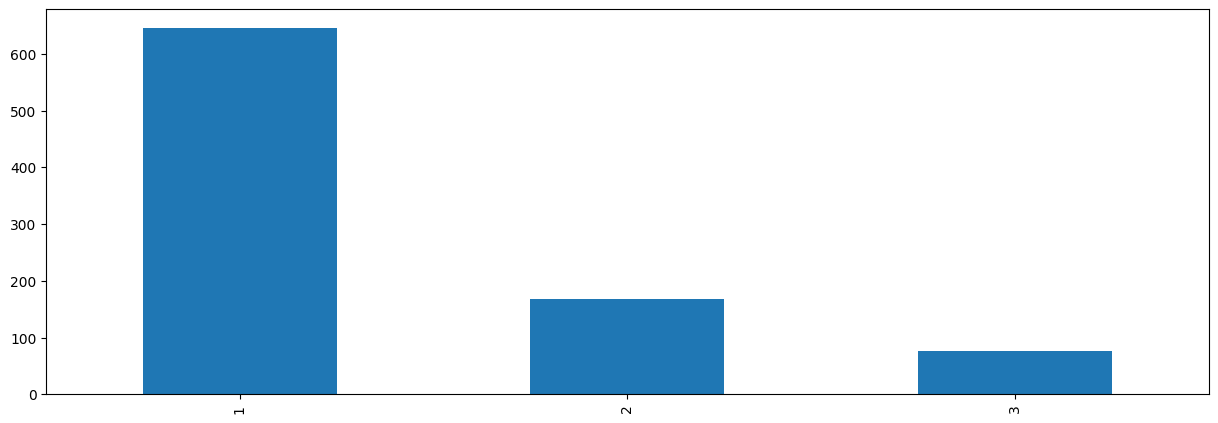

In [59]:
# gráfico de frequência
foo = df_train['embarked'].value_counts().sort_index()
foo.plot(kind='bar', figsize = (15, 5))

In [60]:
(df_train.groupby(by = 'embarked')['survived'].value_counts(normalize = True).sort_index() * 100).round(2)

embarked  survived
1         0.0         66.10
          1.0         33.90
2         0.0         44.64
          1.0         55.36
3         0.0         61.04
          1.0         38.96
Name: survived, dtype: float64

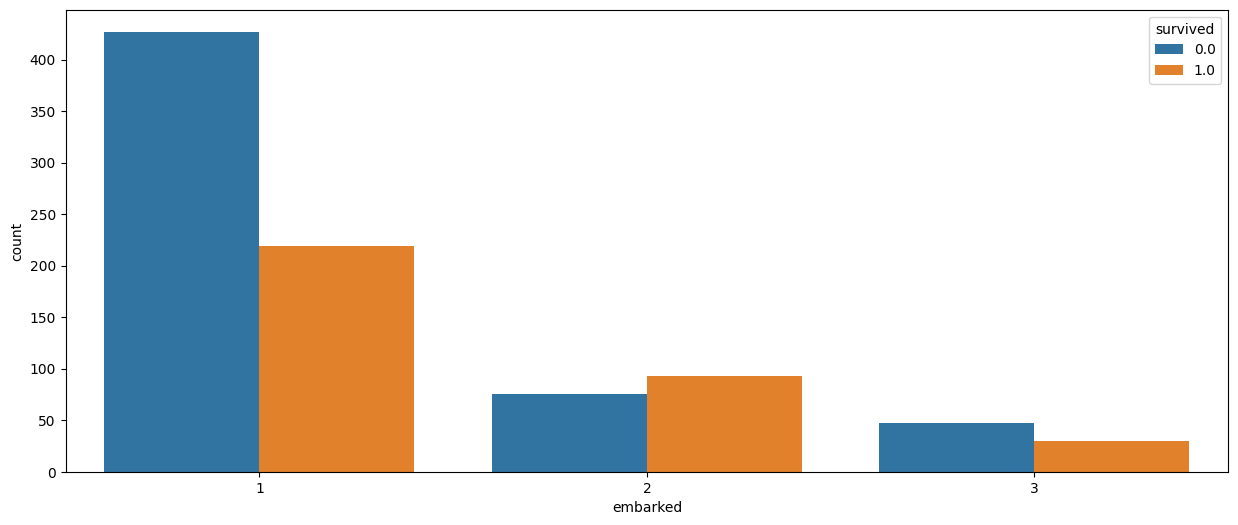

In [61]:
# correlação de classe sobrevivencia ou náo
plt.figure(figsize=(15, 6))
sns.countplot(data = df_train, x='embarked', hue='survived')
plt.show()

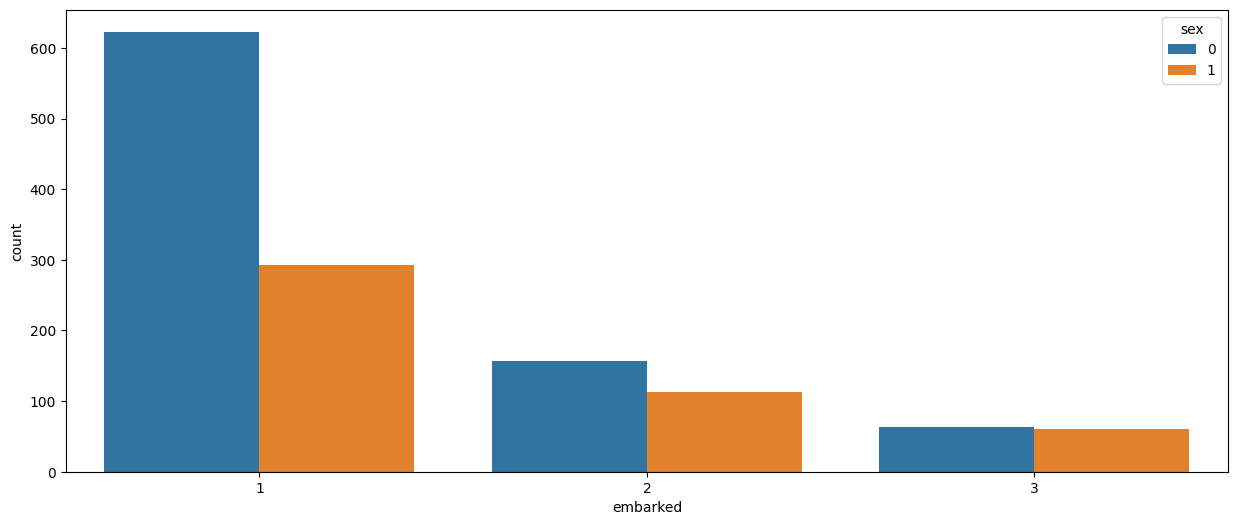

In [62]:
# correlação de classe sobrevivencia ou não
plt.figure(figsize=(15, 6))
sns.countplot(data = df, x='embarked', hue='sex')
plt.show()

# Modelagem

In [63]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [64]:
# Separando em X e Y

cols = ['pclass', 'sex', 'age', 'fare', 'embarked']
dados = df_train[cols].copy(), df_test[cols].copy(), df_train.survived

X_train, X_test, y_train = dados

In [65]:
# Criando o modelo e treinando o modelo
clf = tree.DecisionTreeClassifier().fit(X_train, y_train)

In [66]:
# Prevendo os dados
y_pred = clf.predict(X_test)